## Customer Subscription Project

The objective of this project is to increase the rate of premium subscription for a fintech app. This is a syntetic data set but it preserves normal trend for web apps

## Exploratory Data Analysis

In [73]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import os
import feather
from IPython.display import Audio
sound_file ='laugh.wav'


In [74]:
#import data, and parse dates columns as date
df = pd.read_csv('data/appdata10.csv', parse_dates= ['first_open','enrolled_date'])
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null datetime64[ns]
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null datetime64[ns]
liked                   50000 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 4.6+ MB


In [76]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
df['hour']= df.hour.str.slice(1,3).astype(int)
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [78]:
#use just numeric data for EDA
df_eda = df.drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])
df_eda.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [79]:
len(df_eda.columns)

7

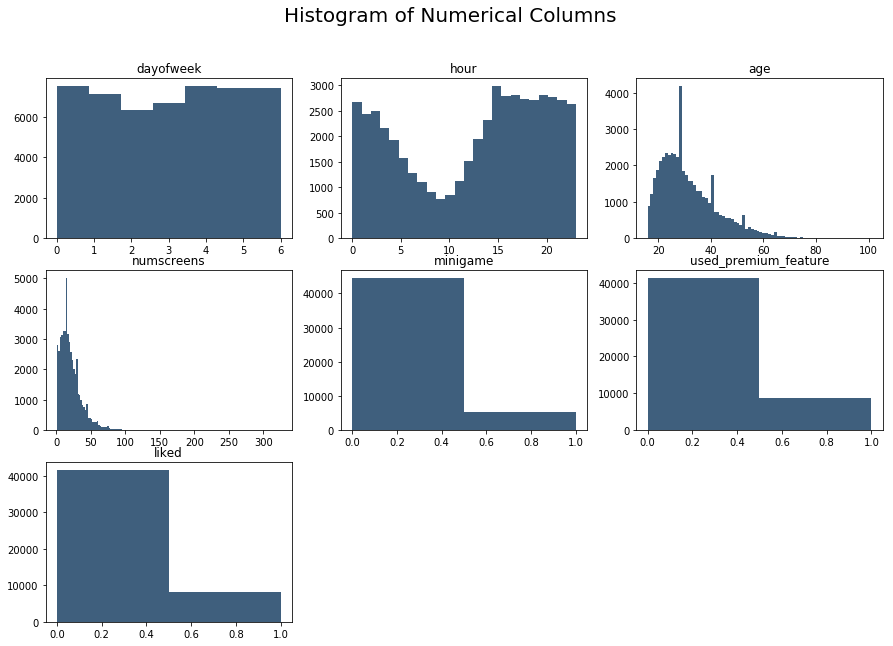

In [80]:
fig =plt.figure(figsize=(15,10))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)
for i in range(len(df_eda.columns)):
    plt.subplot(3,3,i+1)
    f = plt.gca()
    f.set_title(df_eda.columns[i])
    vals = np.size(df_eda.iloc[:,i].unique())
    plt.hist(df_eda.iloc[:,i],bins = vals,color='#3f5f7d')

In [81]:
#sns.pairplot(df,hue='enrolled')

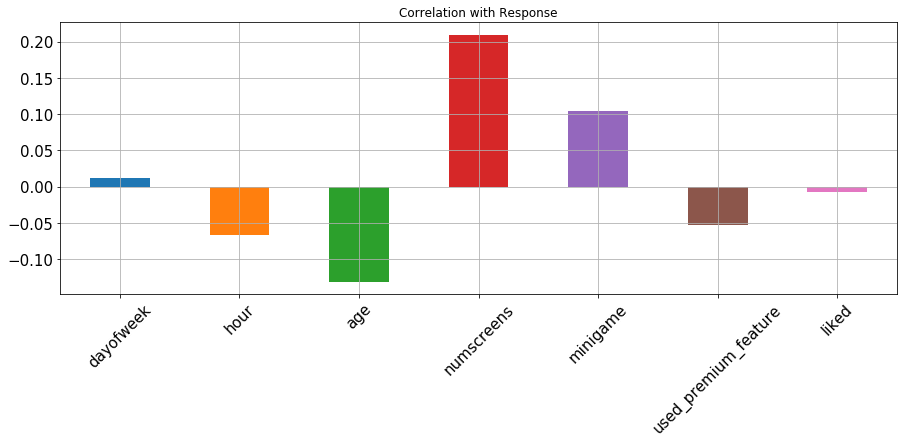

In [82]:
df_eda.corrwith(df.enrolled).plot.bar(figsize=(15,5), title='Correlation with Response',fontsize = 15,rot=45,grid= True )

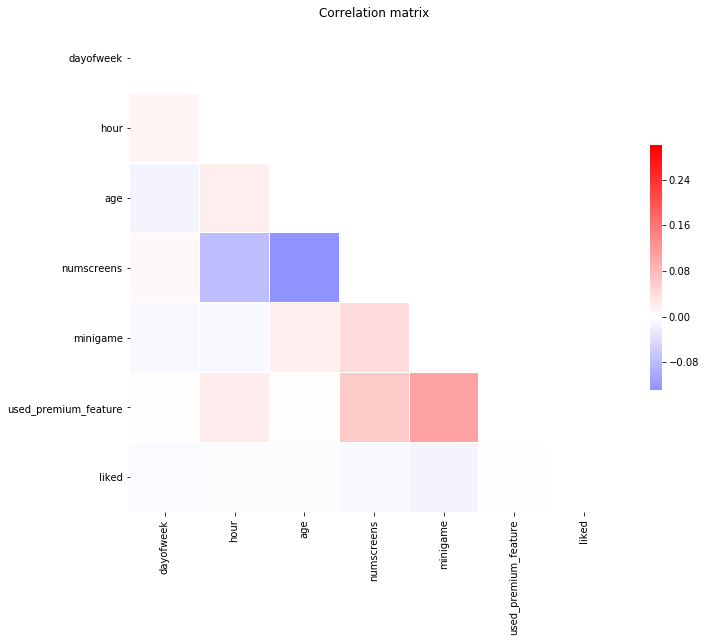

In [83]:
# Compute the correlation matrix
corr = df_eda.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation matrix')

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='bwr', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature engineering

In [84]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

Text(0.5, 1.0, 'Distribution of time since Enrolled')

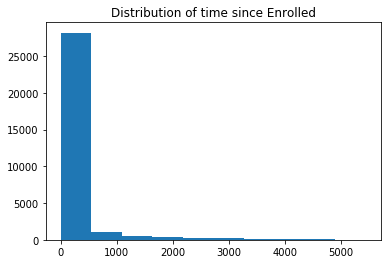

In [85]:
df['difference_time']=(df.enrolled_date-df.first_open).astype('timedelta64[h]')
plt.hist(df['difference_time'].dropna())
plt.title('Distribution of time since Enrolled')

Text(0.5, 1.0, 'Distribution of time since Enrolled')

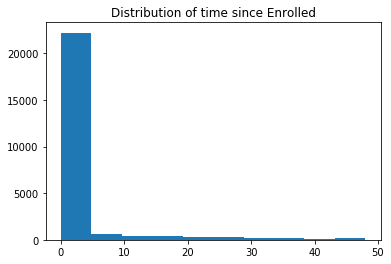

In [86]:
plt.hist(df['difference_time'].dropna(),range=[0,48])
plt.title('Distribution of time since Enrolled')

In [87]:
#We are going to study just people that enrolled before the 48 hours, because is the majority of the users
df.loc[df.difference_time >48,'enrolled']=0
df.drop(columns=['difference_time','enrolled_date','first_open'], inplace=True)

In [88]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [89]:
#load the top 58 screeens of the app
top_screens = pd.read_csv('data/top_screens.csv')
top_screens.shape

(58, 2)

In [90]:
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [91]:
#list of top screens
top_screens = top_screens.top_screens.values

In [92]:
#create a columns for each top_screens
for screen in top_screens:
    df[screen]= df.screen_list.str.contains(screen).astype(int)
    df['screen_list'] = df.screen_list.str.replace(screen+',','')

In [93]:
#count number of other screens and remove it form the data frame
df['screen_list']=df['screen_list']+','
df['other_screens'] = df['screen_list'].str.count(',')
df.drop(columns=['screen_list'],inplace=True)


In [94]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other_screens
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,8
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


## Remove Funnels

In [95]:
# Removing screen with same funnel
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
#create column with the funnel and delete the columns from the screens
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)


In [96]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
#create column with the funnel and delete the columns from the screens
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)



In [97]:
cc_screens = ["CC1","CC1Category","CC3"]
#create column with the funnel and delete the columns from the screens
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)



In [98]:
loan_screens = ["Loan","Loan2","Loan3","Loan4"]
#create column with the funnel and delete the columns from the screens
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)

In [99]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other_screens,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,2
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,7,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [100]:
df.to_csv('clean_appdata10.csv',index=False)

In [101]:
#save the file to feather format
os.makedirs('tmp',exist_ok=True)
df.to_feather('tmp/clean_data')

In [102]:
#read feather
df_test =feather.read_dataframe('tmp/clean_data')

In [103]:
Audio(sound_file, autoplay=True)